In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib notebook

In [25]:
def f(y, t, params):
    Ntot, Nqll = y      # unpack current values of y
    Vkin = params[0]
    Nstar = params[1]
    Nbar = params[2]
    SigmaI = params[3]
    Sigma0 = params[4]
    m = (Nqll- (Nbar - Nstar))/(2*Nstar); #print(m)
    SigmaM = (SigmaI - m*Sigma0)/(1+m*Sigma0); #print(SigmaM)
    Nqllp = 2*np.pi*(-Nstar*np.cos(Ntot*2*np.pi))
    
    
    dNtotdt = SigmaM*Vkin
    dNqlldt = SigmaM*Vkin*Nqllp
  # unpack parameters
    derivs = [dNtotdt, dNqlldt]
    return derivs


In [26]:
#parameters
Vkin = 0.16
Nbar = 1
Nstar = 0.14
#SigmaI = 0.20 # This will growth
#SigmaI = 0.18 # This will produce no growth or ablation
SigmaI = -.01 # This will produce ablation
Sigma0 = 0.19

#initial values
Nqll0 = Nbar
Ntot0 = 2


# Bundle parameters for ODE solver
params = [Vkin,Nstar, Nbar, SigmaI, Sigma0]

# Bundle initial conditions for ODE solver
y0 = [Ntot0, Nqll0]

# Make time array for solution
tStop = 300.
tInc = .001
trange = np.arange(0., tStop, tInc)


In [27]:
# x1,x2 = f(y0, 0, params)
# print(x1, x2)

In [28]:
Ntotn = Ntot0
Nqlln = Nqll0
y = [Ntotn, Nqlln]
Ntotsoln = np.zeros(len(trange))
Nqllsoln = np.zeros(len(trange))
for i in range(len(trange)):
    dNtotdt, dNqlldt = f(y, 0, params)
    Ntotn, Nqlln = y
    Ntotnext = Ntotn + tInc*dNtotdt
    Nqllnext = Nqlln + tInc*dNqlldt
    Ntotsoln[i]=Ntotnext
    Nqllsoln[i]=Nqllnext
    y = [Ntotnext, Nqllnext]

<IPython.core.display.Javascript object>


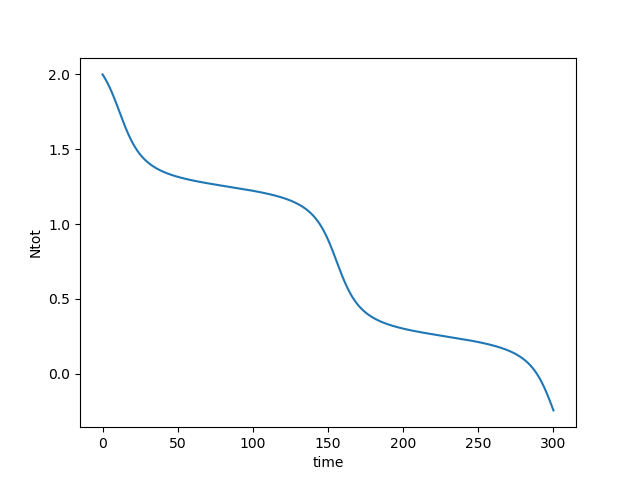

<IPython.core.display.Javascript object>


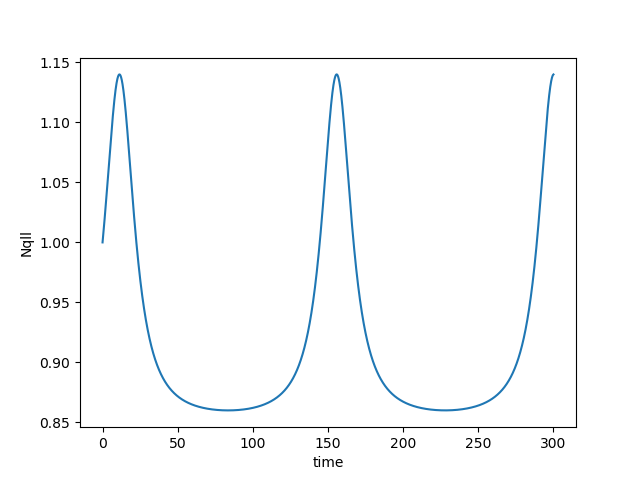

Text(0,0.5,'Nqll')

In [29]:
# Plot results

# Plot theta as a function of time\
plt.figure()
plt.plot(trange, Ntotsoln)
plt.xlabel('time')
plt.ylabel('Ntot')

# Plot omega as a function of 
plt.figure()
plt.plot(trange, Nqllsoln)
plt.xlabel('time')
plt.ylabel('Nqll')

In [30]:
Ntotsoln

array([ 1.99998466,  1.99996931,  1.99995397, ..., -0.24492798,
       -0.24495487, -0.24498176])